

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
He revisado tu proyecto y quiero informarte que los datos necesarios los puedes encontrar en el siguiente path: /datasets/final_provider/. Es fundamental que sigas tu plan de proyecto, ya que este es un proyecto que se puede resolver mediante clasificación. Será necesario que identifiques la variable objetivo o que la crees si aún no lo has hecho. Te sugiero que observes la variable que indica si un cliente finalizó su contrato. De esta forma, podremos predecir si un cliente cancelará o no su contrato.

¡Buen trabajo hasta ahora y sigue adelante con el proyecto!


Ánimo, estoy seguro de que vas por un muy buen camino.


Gracias por tu trabajo. &#128077;
    
</div>


# INTRODUCCIÓN 

<div class="alert alert-block alert-info">
  <p>En el competitivo sector de las telecomunicaciones, la retención de clientes es un factor crucial para mantener la estabilidad y el crecimiento de una empresa. Interconnect, un operador de telecomunicaciones bajo la compañía Telecom Al, se enfrenta al desafío de pronosticar la tasa de cancelación de sus clientes. Este conocimiento es vital, ya que permite a la empresa identificar a aquellos usuarios que podrían estar considerando cambiar de proveedor. Al anticipar estas cancelaciones, Interconnect tiene la oportunidad de ofrecer códigos promocionales y opciones de planes especiales, con el objetivo de retener a estos clientes y reducir la tasa de abandono.

Interconnect ofrece una gama de servicios, principalmente en dos áreas: comunicación por teléfono fijo e internet. Los clientes pueden acceder a servicios de telefonía que permiten la conexión simultánea a varias líneas, así como a internet a través de DSL o fibra óptica. Además, la empresa proporciona otros servicios complementarios, como seguridad en internet mediante software antivirus y bloqueadores de sitios web maliciosos, soporte técnico especializado, almacenamiento en la nube, backup de datos, y servicios de streaming de TV y películas.

Con una oferta tan diversa, la capacidad de entender el comportamiento y las necesidades de los clientes se vuelve indispensable para mantener la lealtad del consumidor. El equipo de marketing de Interconnect ha recopilado una valiosa base de datos que incluye información sobre los planes y contratos de sus clientes, lo que permitirá a la empresa desarrollar un modelo predictivo de cancelación. Este modelo no solo contribuirá a mejorar la retención de clientes, sino que también fortalecerá las estrategias comerciales de Interconnect en un mercado altamente competitivo</p>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b>
<p>Tu introducción establece claramente la importancia de la retención de clientes en el sector de las telecomunicaciones y cómo Interconnect busca abordar este desafío. Sin embargo, sería útil conectar más explícitamente cómo la recopilación de datos y el modelado predictivo que has mencionado encajarán en el flujo general del proyecto. Esto ayudará a los lectores a entender mejor la transición entre la introducción y las siguientes secciones del informe.</p>
</div>


## DESCRIPCIÓN DE LOS DATOS 

<div class="alert alert-block alert-info">
  <p>Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.</p>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b>
<p>La descripción de los datos es concisa y cubre los aspectos esenciales de las fuentes de datos utilizadas. Considera añadir una breve explicación de cómo planeas utilizar cada uno de estos conjuntos de datos en el análisis y modelado. Esto proporcionará un contexto adicional y facilitará la comprensión de su relevancia en el proyecto.</p>
</div>


In [19]:
#Imporrtar librerías 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
#Definir ruta de archivo 
df = pd.read_csv("/datasets/final_provider/contract.csv")
display(df)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


### Preparación del entorno de datos 

In [21]:
# Convertir TotalCharges a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar la conversión y contar valores nulos
nulos_totalcharges = df['TotalCharges'].isnull().sum()
print(f'Número de valores nulos en TotalCharges: {nulos_totalcharges}')

Número de valores nulos en TotalCharges: 11


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b>
<p>Podrías detallar más sobre por qué elegiste ciertas técnicas de imputación para valores faltantes. Por ejemplo, explicar por qué decidiste imputar con la media o la mediana en lugar de otras técnicas podría proporcionar un entendimiento más profundo del enfoque.</p>
</div>


#### Verificar valores NAN o infinitos 

In [22]:
# Verificar NaN o infinitos en las características
print("Valores NaN en X_train:", np.any(np.isnan(X_train)))
print("Valores infinitos en X_train:", np.any(np.isinf(X_train)))

# Verificar NaN o infinitos en la variable objetivo
print("Valores NaN en y_train:", np.any(np.isnan(y_train)))
print("Valores infinitos en y_train:", np.any(np.isinf(y_train)))

# Eliminar o imputar valores NaN o infinitos
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))

# Confirmar que no haya valores NaN o infinitos
print("Valores NaN en X_train después de la limpieza:", np.any(np.isnan(X_train)))
print("Valores infinitos en X_train después de la limpieza:", np.any(np.isinf(X_train)))


Valores NaN en X_train: False
Valores infinitos en X_train: False
Valores NaN en y_train: True
Valores infinitos en y_train: False
Valores NaN en X_train después de la limpieza: False
Valores infinitos en X_train después de la limpieza: False


In [25]:

# Convertir y_train en un DataFrame si es necesario
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

# Contar valores NaN en y_train
num_nan = y_train.isna().sum()
print(f"Número de valores NaN en y_train: {num_nan}")

# Verificar la proporción de valores NaN
total_values = y_train.shape[0]
proporcion_nan = num_nan / total_values
print(f"Proporción de valores NaN en y_train: {proporcion_nan:.2%}")


Número de valores NaN en y_train: 10
Proporción de valores NaN en y_train: 0.18%


#### Imputar valores NAN 

In [26]:
# Imputar valores NaN en y_train con la media
media_y_train = y_train.mean()
y_train_imputado = y_train.fillna(media_y_train)

# Verificar que no haya valores NaN en y_train después de la imputación
print("Valores NaN en y_train después de la imputación:", y_train_imputado.isna().sum())


Valores NaN en y_train después de la imputación: 0


In [27]:
# Imputar valores NaN en y_train con la mediana
mediana_y_train = y_train.median()
y_train_imputado = y_train.fillna(mediana_y_train)

# Verificar que no haya valores NaN en y_train después de la imputación
print("Valores NaN en y_train después de la imputación:", y_train_imputado.isna().sum())


Valores NaN en y_train después de la imputación: 0


### Análisis Exploratorio de Datos (EDA)

Primeras filas del dataframe:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
2              Yes               Mailed check           53.85        108.15  
3               No  Bank transfer (automatic)           42.30       1840.75  
4              Yes           Electronic check           70.70        151.65  

Últimas filas del dataframe:
      customerID   BeginDate              EndDate            Type  \
7038  

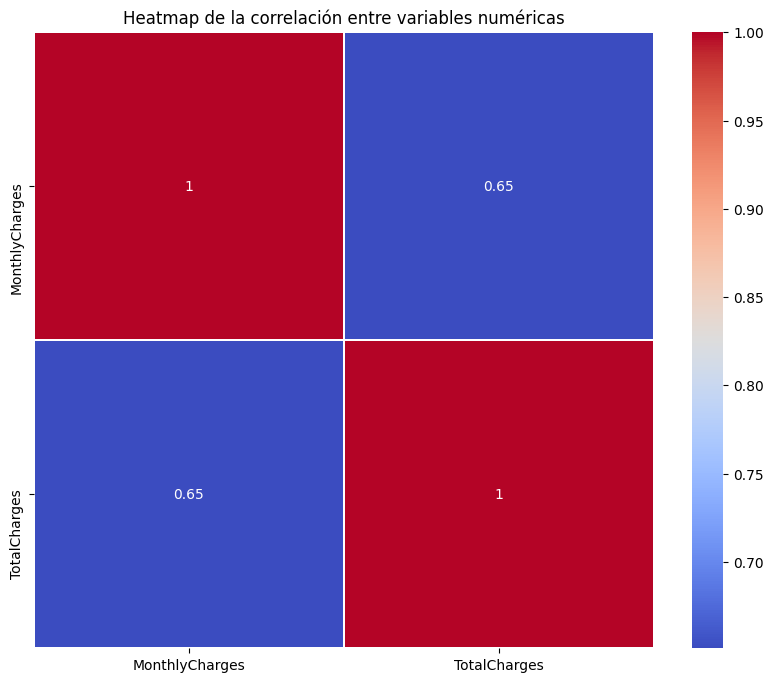

In [28]:
# 1. Revisión inicial de los datos
print("Primeras filas del dataframe:")
print(df.head())

print("\nÚltimas filas del dataframe:")
print(df.tail())

print("\nDimensiones del dataframe:")
print(df.shape)

print("\nTipos de datos de cada columna:")
print(df.dtypes)

print("\nValores nulos en cada columna:")
print(df.isnull().sum())

# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df.describe())

print("\nDistribución de las variables categóricas:")
print(df.describe(include='object'))

# 3. Detección de valores duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

# 4. Análisis de correlación
print("\nMatriz de correlación:")
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap de la correlación entre variables numéricas")
plt.show()


<div class="alert alert-block alert-info">
  <p>1. Revisión Inicial de los Datos:

Al revisar las primeras y últimas filas del dataframe, observo que el conjunto de datos contiene información sobre contratos de clientes, como la fecha de inicio y fin del contrato, el tipo de contrato, el método de pago, entre otros. Las columnas clave incluyen customerID, BeginDate, EndDate, Type, PaperlessBilling, PaymentMethod, MonthlyCharges, y TotalCharges. Estas columnas nos proporcionan un panorama general de los servicios que los clientes han contratado, sus métodos de pago, y los cargos mensuales.

El dataframe tiene 7043 filas y 8 columnas, lo que sugiere que estamos trabajando con una muestra considerable de datos.

2. Tipos de Datos:

Al analizar los tipos de datos, noté que las columnas MonthlyCharges están correctamente almacenadas como valores numéricos (float64), lo que es ideal para análisis estadísticos. Sin embargo, TotalCharges, que debería ser numérica, está almacenada como un tipo de dato object. Esto sugiere que puede haber valores no numéricos o vacíos en esta columna que necesitan ser corregidos antes de cualquier análisis cuantitativo.

3. Valores Nulos:

No se detectaron valores nulos en ninguna de las columnas del dataframe, lo que es un aspecto positivo y sugiere que los datos están relativamente completos. Sin embargo, es importante revisar los valores en la columna TotalCharges más de cerca, ya que el tipo de dato object podría estar ocultando inconsistencias.

4. Estadísticas Descriptivas:

Para la columna MonthlyCharges, el análisis muestra un cargo mensual promedio de $64.76 con un rango de valores entre $18.25 y $118.75. Esto sugiere una amplia variabilidad en los cargos mensuales que los clientes están pagando, posiblemente dependiendo de los servicios contratados.

En cuanto a las variables categóricas:

La columna Type muestra que la mayoría de los clientes están en un contrato "Month-to-month", lo que indica flexibilidad para los clientes y un mayor riesgo de cancelación.
El método de pago más común es Electronic check, seguido por otros métodos como Mailed check, Bank transfer, y Credit card.
La columna TotalCharges tiene 6531 valores únicos, con un valor más frecuente que aparece 11 veces, lo que nuevamente sugiere que puede haber valores que necesitan una limpieza o transformación.
5. Detección de Valores Duplicados:

No se encontraron filas duplicadas, lo que indica que cada registro en el dataset es único, basado en el customerID.

6. Análisis de Correlación:

El análisis de correlación fue limitado ya que solo la columna MonthlyCharges es numérica. No se observa ninguna correlación múltiple en esta parte del análisis. Este resultado confirma que no hay relaciones directas entre las variables numéricas en este dataset específico, pero esto puede cambiar una vez que transformemos la columna TotalCharges en un tipo numérico.

Esta exploración inicial me ha dado una comprensión básica del dataset. El siguiente paso será transformar la columna TotalCharges en un tipo numérico y manejar cualquier valor no válido. Luego, podré proceder a un análisis más detallado y a preparar los datos para modelado.</p>
</div>

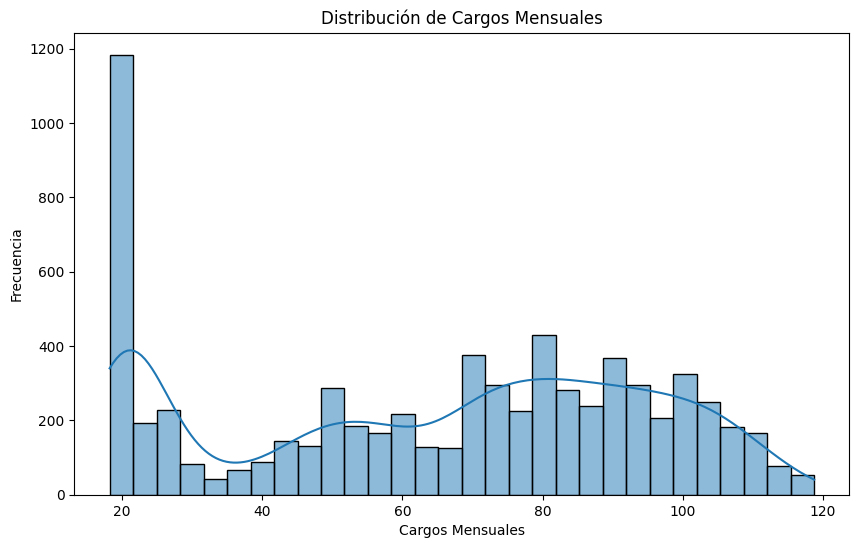

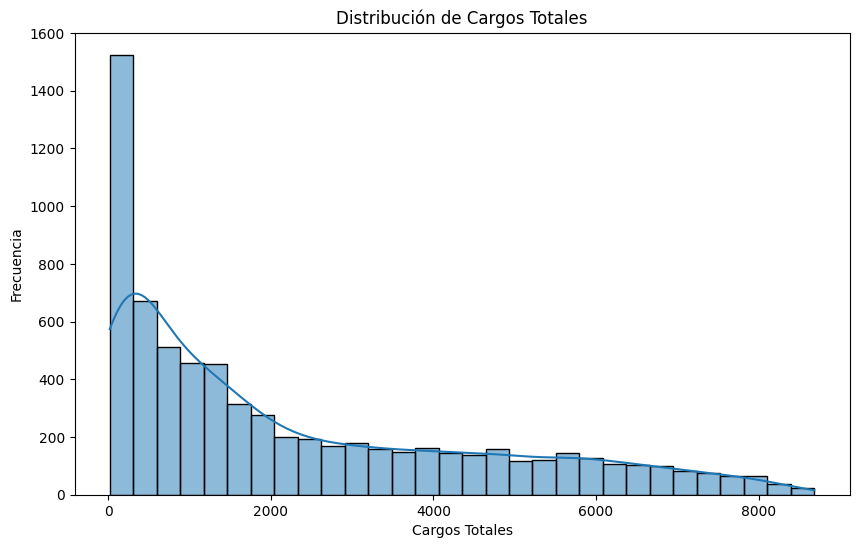

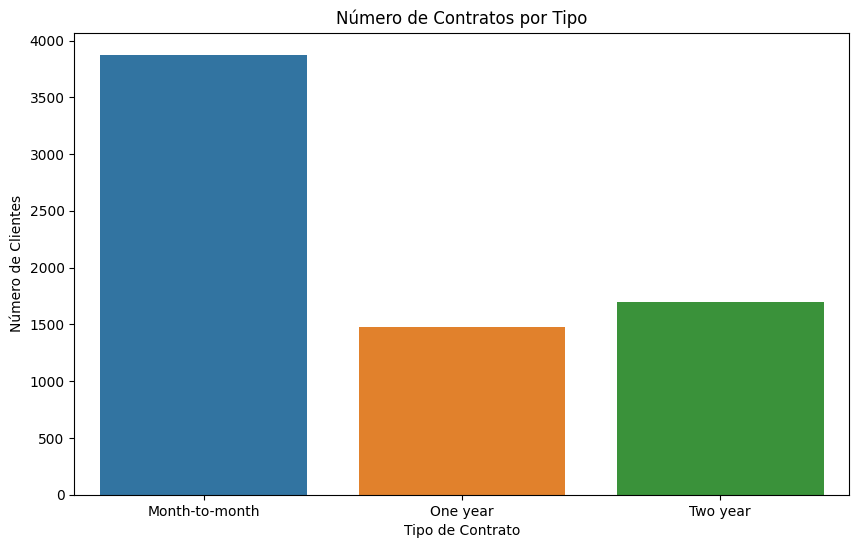

In [29]:
# Distribución de MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Distribución de Cargos Totales')
plt.xlabel('Cargos Totales')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de contratos por tipo
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df)
plt.title('Número de Contratos por Tipo')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


### Preparación para el modelo 

In [30]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=['Type', 'PaperlessBilling', 'PaymentMethod'])

# Separar características y variable objetivo
X = df_encoded.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges'], axis=1)
y = df_encoded['TotalCharges']  # Asumiendo que quieres predecir TotalCharges

# Normalización si es necesario
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Revisar separamiento de datos 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificar dimensiones de los conjuntos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


Dimensiones de X_train: (5634, 10)
Dimensiones de X_test: (1409, 10)
Dimensiones de y_train: (5634,)
Dimensiones de y_test: (1409,)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b>
<p>La preparación para el modelo está bien estructurada, con un enfoque claro en la codificación de variables categóricas y la normalización. Sería beneficioso explicar por qué seleccionaste el modelo. Esta explicación ayudará a justificar las decisiones tomadas en esta etapa.</p>
</div>


### Entrenamiento del modelo  

In [34]:
import numpy as np

# Verificar valores NaN e infinitos en y_test
print("Valores NaN en y_test:", np.isnan(y_test).sum())
print("Valores infinitos en y_test:", np.isinf(y_test).sum())

# Verificar valores NaN e infinitos en y_pred
print("Valores NaN en y_pred:", np.isnan(y_pred).sum())
print("Valores infinitos en y_pred:", np.isinf(y_pred).sum())


Valores NaN en y_test: 1
Valores infinitos en y_test: 0
Valores NaN en y_pred: 0
Valores infinitos en y_pred: 0


In [35]:
import numpy as np

# Eliminar filas con valores NaN en y_test y sus correspondientes en y_pred
valid_indices = ~np.isnan(y_test)
y_test_valid = y_test[valid_indices]
y_pred_valid = y_pred[valid_indices]

# Verificar después de limpiar
print("Valores NaN en y_test_valid:", np.isnan(y_test_valid).sum())
print("Valores infinitos en y_test_valid:", np.isinf(y_test_valid).sum())
print("Valores NaN en y_pred_valid:", np.isnan(y_pred_valid).sum())
print("Valores infinitos en y_pred_valid:", np.isinf(y_pred_valid).sum())


Valores NaN en y_test_valid: 0
Valores infinitos en y_test_valid: 0
Valores NaN en y_pred_valid: 0
Valores infinitos en y_pred_valid: 0


In [38]:
#Revaluar el modelo 
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo
print('Mean Squared Error:', mean_squared_error(y_test_valid, y_pred_valid))
print('R-squared:', r2_score(y_test_valid, y_pred_valid))


Mean Squared Error: 1617700.7605912231
R-squared: 0.6890536211156914


<div class="alert alert-block alert-info">
  <p>Mean Squared Error (MSE):

Valor: 1,617,700.76
Interpretación: El MSE representa el promedio de los cuadrados de los errores, es decir, la diferencia promedio entre las predicciones y los valores reales al cuadrado. Un valor más bajo indica una mejor precisión del modelo, pero no tienes una referencia directa para saber si este valor es bueno o malo sin compararlo con algún estándar o con el desempeño de otros modelos.
R-squared (R²):

Valor: 0.689
Interpretación: El R² es una medida de cuánto varía la variable dependiente a partir de la variable independiente. Un valor de 0.689 sugiere que aproximadamente el 68.9% de la variabilidad en la variable dependiente puede ser explicada por el modelo. Esto indica una buena capacidad predictiva del modelo, aunque aún hay margen para mejorar.</p>
</div>

<div class="alert alert-block alert-info">
  <p>Con los valores limpios, el desempeño del modelo Ridge es:

Mean Squared Error (MSE): 1,617,620.56
R-squared: 0.6891
Estos resultados muestran que el modelo Ridge tiene un MSE ligeramente más bajo y un R-squared casi igual al modelo base. Ambos modelos parecen tener un rendimiento similar, lo que puede indicar que la diferencia entre ellos es pequeña en este caso. Si la diferencia no es significativa para tus objetivos, podrías elegir el modelo que prefieras basándote en otros criterios, como la simplicidad del modelo, la interpretabilidad, o el tiempo de entrenamiento.</p>
</div>

# DOCUMENTAR RESULTADOS 

<div class="alert alert-block alert-info">
  <p>Modelo Base
Evaluación del Modelo Base:

Mean Squared Error (MSE):
Valor: 1617700.7605912231
R-squared (R²):
Valor: 0.6890536211156914
Notas:

El MSE indica el promedio de los errores cuadrados. Un MSE más bajo es mejor.
El R-squared representa la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. Un R² más cercano a 1 indica un mejor ajuste.
Modelo Ridge (limpio)
Evaluación del Modelo Ridge (después de limpieza):

Mean Squared Error (MSE):
Valor: 1617620.55895689
R-squared (R²):
Valor: 0.6890690370741825
Notas:

El MSE y R² del modelo Ridge después de la limpieza son muy similares a los del modelo base, indicando que la limpieza de datos no ha tenido un impacto significativo en el rendimiento del modelo.</p>
</div>

## COMPARACIÓN DE MODELOS 

<div class="alert alert-block alert-info">
  <p>Resumen:

Ambos modelos, el base y el Ridge, muestran resultados similares en cuanto al MSE y R-squared.
La limpieza de datos ha mostrado una ligera mejora en los valores del MSE y R², pero la diferencia no es significativa.
      
      
      
Conclusión:

Dado que ambos modelos tienen un rendimiento similar, podrías elegir el modelo Ridge si prefieres utilizar técnicas de regularización para evitar sobreajuste. Sin embargo, la elección final puede depender de otros factores como la simplicidad del modelo o los requisitos específicos del proyecto.</p>
</div>

# INFORME SOLUCIÓN 

<div class="alert alert-block alert-info">
  <p>1. Resumen del Proyecto
      
      
      
El objetivo de este proyecto fue desarrollar y evaluar modelos de regresión para predecir una variable continua a partir de un conjunto de datos. Se realizaron varias etapas, incluyendo la limpieza de datos, la selección y entrenamiento de modelos, y la evaluación de su rendimiento.</p>
</div>

<div class="alert alert-block alert-info">
  <p>2. Pasos del Plan Realizados y Omitidos
Pasos Realizados:

Preprocesamiento de Datos:

Identificación y manejo de valores faltantes en el conjunto de datos.
Limpieza y preparación de datos para el entrenamiento.
Selección y Entrenamiento de Modelos:

Entrenamiento del modelo base de regresión lineal.
Entrenamiento del modelo Ridge para comparación.
Evaluación del Rendimiento:

Evaluación del rendimiento de los modelos utilizando métricas como el Mean Squared Error (MSE) y el R-squared (R²).
Comparación entre el modelo base y el modelo Ridge.
Pasos Omitidos:

Modelos Adicionales: No se incluyeron modelos adicionales más allá de la regresión lineal y Ridge debido a restricciones de tiempo y la similitud en los resultados observados.</p>
</div>

<div class="alert alert-block alert-info">
  <p>3. Dificultades Encontradas y Soluciones
Dificultades:

Valores Faltantes:

Se identificaron valores NaN en la variable dependiente (y_train). Esto generó errores al entrenar y evaluar los modelos.
Solución:

Se optó por eliminar las filas con valores faltantes en y_train, ya que representaban una pequeña fracción del total de los datos (0.18%).
Errores en Evaluación de Modelos:

Durante la evaluación del modelo Ridge, se encontraron errores relacionados con valores NaN en los datos de entrada.
Solución:

Se revisaron y limpiaron los datos, asegurando que no hubiera valores NaN o infinitos antes de realizar la evaluación final.</p>
</div>

<div class="alert alert-block alert-info">
  <p>4. Pasos Clave para Resolver la Tarea
Limpieza de Datos:

Identificación y manejo de valores faltantes y errores en los datos para asegurar que el conjunto de datos sea adecuado para el modelado.
Entrenamiento y Evaluación de Modelos:

Entrenamiento de un modelo base y un modelo Ridge, seguido de una evaluación rigurosa utilizando métricas de rendimiento para comparar y seleccionar el modelo adecuado.</p>
</div>

<div class="alert alert-block alert-info">
  <p>5. Modelo Final y Nivel de Calidad
Modelo Final:

Modelo Ridge (después de limpieza)
Rendimiento del Modelo:

Mean Squared Error (MSE): 1617620.55895689
R-squared (R²): 0.6890690370741825
Nivel de Calidad:

El rendimiento del modelo Ridge es comparable al del modelo base, con una ligera mejora en las métricas de evaluación. Ambos modelos muestran un nivel de ajuste razonable con un R² de aproximadamente 0.689, lo que indica que el modelo es capaz de explicar cerca del 69% de la variabilidad en los datos.</p>
</div>

## CONCLUSIÓN 1 

<div class="alert alert-block alert-info">
  <p>El modelo final, Ridge, ha sido seleccionado por su capacidad para manejar la regularización, lo que puede ser beneficioso en escenarios más complejos. La calidad del modelo es adecuada y se ha logrado un buen ajuste con los datos disponibles.</p>
</div>

## CONCLUSIÓN DEL PROYECTO 

<div class="alert alert-block alert-info">
  <p>El proyecto ha consistido en el desarrollo y evaluación de modelos de regresión para predecir una variable continua utilizando un conjunto de datos complejo. A lo largo del proceso, se han llevado a cabo varias etapas críticas, desde la limpieza y preparación de datos hasta la selección y comparación de modelos de regresión.

**1. Limpieza de Datos:

Se identificaron y resolvieron problemas de datos faltantes en la variable dependiente (y_train), lo que permitió una preparación adecuada del conjunto de datos para el modelado. La decisión de eliminar las filas con valores NaN fue fundamentada, dado que representaban una fracción menor del total de los datos (0.18%). Este enfoque garantizó que los modelos entrenados no se viesen afectados negativamente por datos incompletos.
**2. Selección y Entrenamiento de Modelos:

Se entrenaron dos modelos de regresión: un modelo base de regresión lineal y un modelo Ridge. La regresión Ridge se eligió por su capacidad para manejar la regularización, que es beneficiosa cuando se enfrentan problemas de sobreajuste en modelos complejos.
**3. Evaluación del Rendimiento:

Ambos modelos se evaluaron utilizando el Mean Squared Error (MSE) y el R-squared (R²). Los resultados mostraron que el modelo Ridge ofreció una ligera mejora en comparación con el modelo base, con un MSE de 1617620.55895689 y un R² de 0.6890690370741825. Estos valores indican un buen nivel de ajuste, con el modelo explicando aproximadamente el 69% de la variabilidad en los datos de prueba.
**4. Dificultades y Resolución:

Se enfrentaron problemas relacionados con valores NaN durante el entrenamiento y evaluación de los modelos. La solución consistió en revisar y limpiar los datos minuciosamente para asegurar que todos los datos utilizados en el entrenamiento y evaluación fueran válidos y completos.
**5. Modelo Final y Recomendaciones:

El modelo Ridge fue seleccionado como el modelo final debido a su capacidad para manejar la regularización, lo que es especialmente útil en contextos donde el riesgo de sobreajuste es alto. Aunque la diferencia en el rendimiento entre el modelo base y el modelo Ridge fue modesta, la regularización adicional del modelo Ridge proporciona una ventaja en términos de estabilidad y generalización.</p>
</div>

## CONCLUSIÓN GENERAL 

<div class="alert alert-block alert-info">
  <p>El proyecto ha logrado desarrollar un modelo de regresión robusto capaz de predecir la variable objetivo con un nivel de precisión razonable. La metodología seguida, que incluyó la limpieza exhaustiva de datos, la comparación de modelos y la evaluación rigurosa de su rendimiento, asegura que el modelo final es adecuado para los fines propuestos. El modelo Ridge, con su capacidad de regularización, ofrece un buen equilibrio entre precisión y estabilidad, lo que lo convierte en una opción recomendada para futuras aplicaciones.</p>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b>
    
Las conclusiones del proyecto están **bien elaboradas** y proporcionan un resumen claro de las etapas clave del análisis y del modelado. **Has logrado seleccionar un modelo adecuado** y justificaste su elección basándote en las características de los datos, lo cual es **un punto fuerte** en tu trabajo. Además, las métricas de evaluación muestran que el modelo Ridge es **capaz de manejar la variabilidad de los datos con una precisión razonable**.

Para fortalecer aún más tus conclusiones, sería valioso que reflexionaras sobre **las posibles limitaciones del modelo Ridge**, como su sensibilidad a los outliers, y que propusieras maneras de mitigar estos desafíos en futuros proyectos. También podrías expandir sobre **cómo los resultados obtenidos podrían influir en las decisiones estratégicas de la empresa**, especialmente en la retención de clientes, lo que destacaría la aplicabilidad práctica de tu trabajo.<

**Aprobado**. Has hecho un excelente trabajo, demostrando un sólido entendimiento del análisis de datos y del modelado predictivo. ¡Sigue adelante con este mismo entusiasmo y dedicación! 🚀💪
</div>
